# Viêm phổi là gì?
**Viêm phổi là một tình trạng viêm ở phổi, chủ yếu ảnh hưởng đến các túi khí nhỏ gọi là phế nang. Các triệu chứng điển hình thường bao gồm một số kết hợp của ho có đờm hoặc ho khô, đau ngực, sốt và khó thở. Mức độ nghiêm trọng của bệnh có thể khác nhau. Viêm phổi thường do nhiễm trùng bởi virus hoặc vi khuẩn, và ít phổ biến hơn là do các vi sinh vật khác, một số loại thuốc hoặc các tình trạng như bệnh tự miễn. Các yếu tố nguy cơ bao gồm xơ nang, bệnh phổi tắc nghẽn mãn tính (COPD), hen suyễn, tiểu đường, suy tim, tiền sử hút thuốc, khả năng ho kém như sau đột quỵ và hệ miễn dịch yếu. Chẩn đoán thường dựa trên triệu chứng và kiểm tra lâm sàng. Chụp X-quang ngực, xét nghiệm máu và cấy đờm có thể giúp xác nhận chẩn đoán. Bệnh có thể được phân loại theo nơi mắc phải, chẳng hạn như viêm phổi cộng đồng, viêm phổi bệnh viện hoặc viêm phổi liên quan đến chăm sóc y tế.**
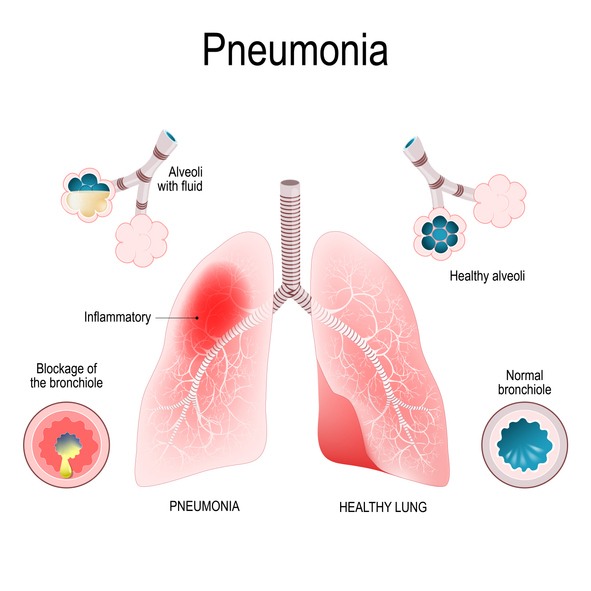

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\.DS_Store
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\.DS_Store
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_x

# Thêm thư viện cần thiết

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Mô tả bộ dữ liệu ảnh viêm phổi
**Bộ dữ liệu được tổ chức thành 3 thư mục (train, test, val) và chứa các thư mục con cho từng loại hình ảnh (Pneumonia/Normal). Bộ dữ liệu bao gồm 5.863 hình ảnh X-quang (JPEG) và 2 loại (Pneumonia/Normal).
Các hình ảnh X-quang ngực (chụp từ trước ra sau) được chọn từ các nhóm bệnh nhân nhi trong độ tuổi từ một đến năm tuổi.**

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Thêm dữ liệu

In [4]:
train = get_training_data('D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray/train')
test = get_training_data('D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray/test')
val = get_training_data('D:/HUS_22001541/ComputerVision/FinalReport/source/input/chest_xray/val')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6972\771166761.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


# Trực quan hóa & Tiền xử lý dữ liệu

<Axes: xlabel='count'>

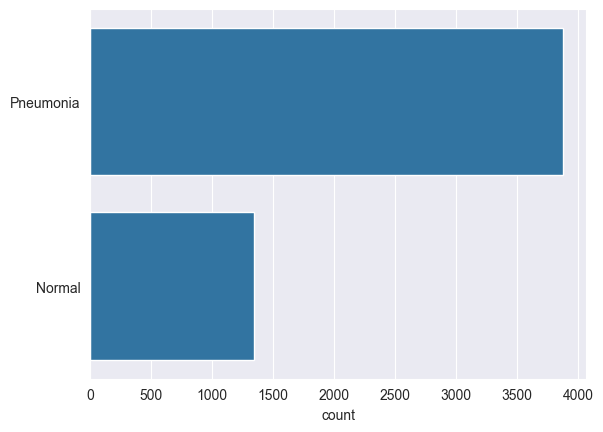

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

**Để tăng số lượng ví dụ huấn luyện, chúng ta sẽ sử dụng kỹ thuật tăng cường dữ liệu (data augmentation).**

Text(0.5, 1.0, 'NORMAL')

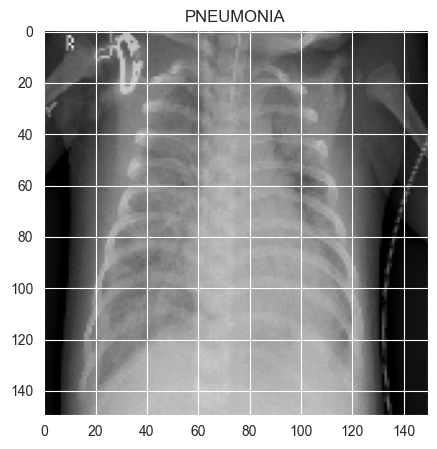

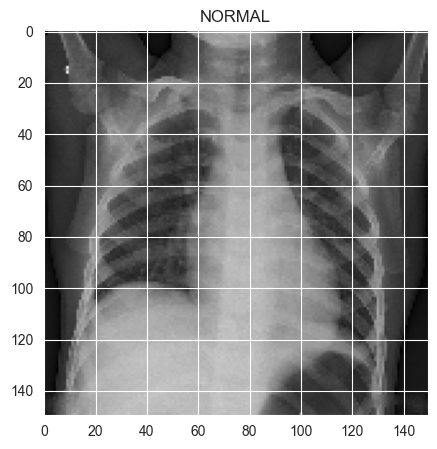

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**Thực hiện chuẩn hóa tập ảnh về dạng grayscale để giảm bớt sự ảnh hưởng về độ sáng, màu sắc. Ngoài ra, mô hình CNN cũng hội tụ nhanh hơn trên tập dữ liệu trong khoảng [0,1] thay vì [0,255]**

In [8]:
# Chuẩn hóa dữ liệu
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# Chuyển kích cỡ ảnh = 150
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
x_train.shape

(5216, 150, 150, 1)

# Tăng cường dữ liệu
**Để tránh vấn đề overfitting (quá khớp) trong huấn luyện mô hình, chúng ta cần mở rộng bộ dữ liệu. Mục tiêu là làm cho bộ dữ liệu huấn luyện hiện tại trở nên lớn hơn bằng cách áp dụng các biến đổi nhỏ như xoay ảnh, lật trái lật phải,... vì không phải ảnh nào cũng sẽ được chụp thẳng.**

In [11]:
datagen = ImageDataGenerator(
        rotation_range=30,  # xoay ngẫu nhiên ảnh trong phạm vi (độ, từ 0 đến 180)
        zoom_range=0.2,  # zoom ngẫu nhiên ảnh
        width_shift_range=0.1,  # di chuyển ngẫu nhiên ảnh theo chiều ngang (tính theo tỷ lệ của chiều rộng tổng thể)
        height_shift_range=0.1,  # di chuyển ngẫu nhiên ảnh theo chiều dọc (tính theo tỷ lệ của chiều cao tổng thể)
        horizontal_flip=True)  # lật ngẫu nhiên ảnh theo chiều ngang

datagen.fit(x_train)

Các bước biến đổi ảnh như sau :
1. Xoay ngẫu nhiên một số hình ảnh huấn luyện một góc 30 độ.
2. Thu nhỏ ngẫu nhiên một số hình ảnh huấn luyện lên đến 20%.
3. Dịch chuyển ngẫu nhiên hình ảnh theo chiều ngang 10% chiều rộng.
4. Dịch chuyển ngẫu nhiên hình ảnh theo chiều dọc 10% chiều cao.
5. Lật ngẫu nhiên hình ảnh theo chiều ngang.

# Mô hình huấn luyện

In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' 
                 , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')) 

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 22s 61ms/step - loss: 0.6188 - accuracy: 0.8355 - val_loss: 37.2554 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 8s 48ms/step - loss: 0.2798 - accuracy: 0.8969 - val_loss: 15.3232 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
162/163 [============================>.] - ETA: 0s - loss: 0.2338 - accuracy: 0.9190
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 8s 47ms/step - loss: 0.2329 - accuracy: 0.9193 - val_loss: 62.0817 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 8s 47ms/step - loss: 0.1602 - accuracy: 0.9471 - val_loss: 17.9384 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.1421 - accuracy: 0.9473
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [=========================

In [15]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 11ms/step - loss: 0.2770 - accuracy: 0.9054
Loss of the model is -  0.2769879102706909
20/20 [==============================] - 0s 11ms/step - loss: 0.2770 - accuracy: 0.9054
Accuracy of the model is -  90.54487347602844 %


# Phân tích, trực quan hóa đánh giá mô hình

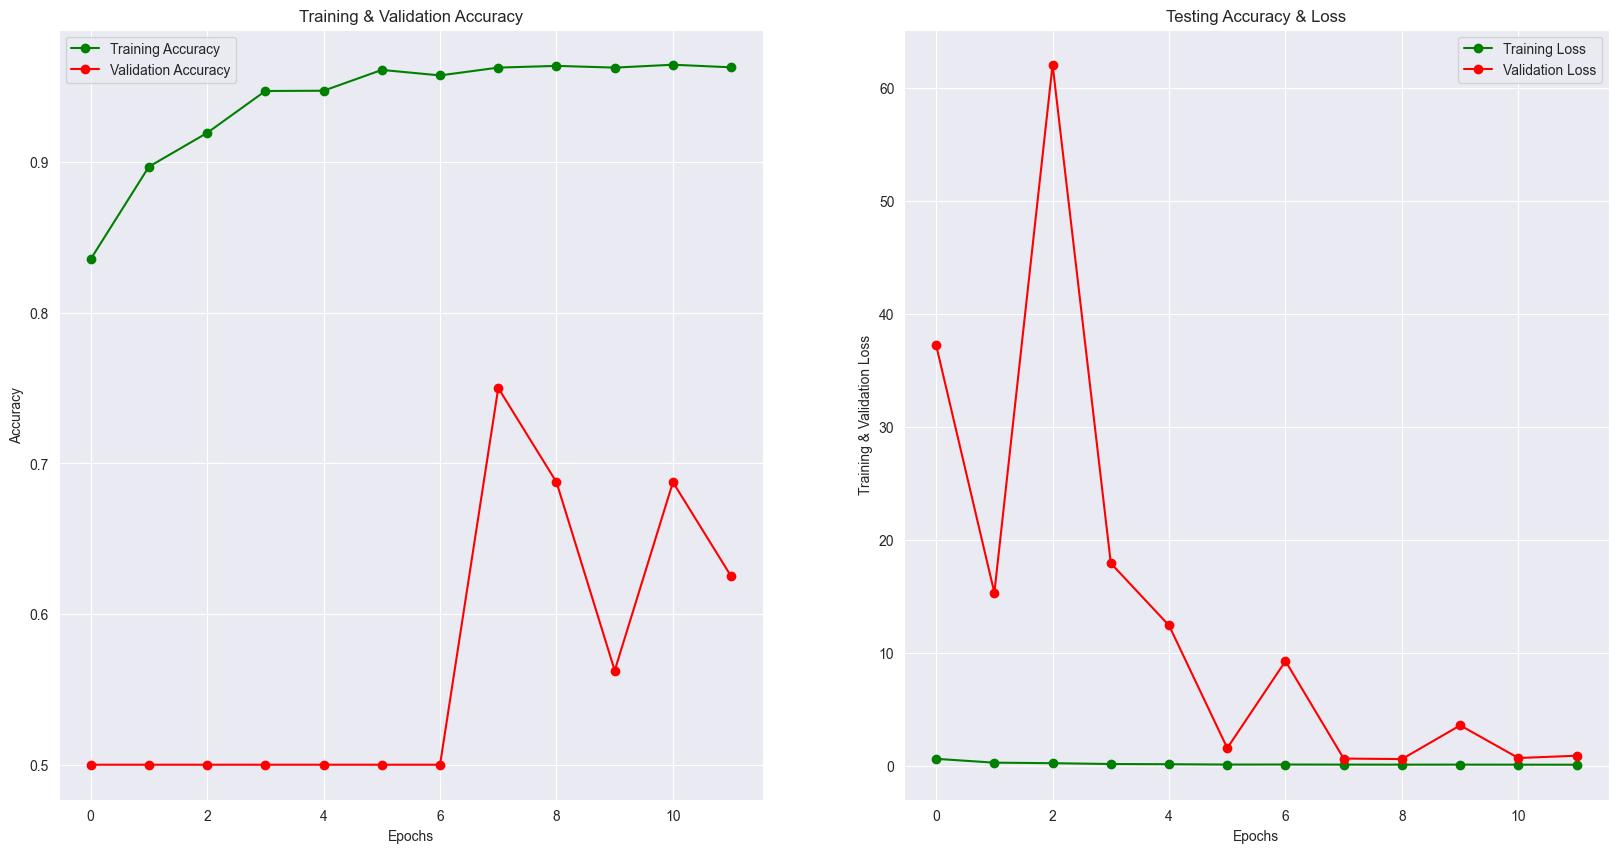

In [16]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [17]:
# Dự đoán xác suất
predictions = model.predict(x_test)

# Chuyển đổi xác suất thành 0 hoặc 1 bằng cách sử dụng ngưỡng 0.5
predictions = (predictions > 0.5).astype(int)
predictions = predictions.reshape(1,-1)[0]
# In ra 15 dự đoán đầu tiên
predictions[:15]


20/20 [==============================] - 0s 10ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [18]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.91      0.92       390
   Normal (Class 1)       0.86      0.90      0.88       234

           accuracy                           0.91       624
          macro avg       0.90      0.90      0.90       624
       weighted avg       0.91      0.91      0.91       624



In [19]:
cm = confusion_matrix(y_test,predictions)
cm

array([[355,  35],
       [ 24, 210]], dtype=int64)

In [20]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

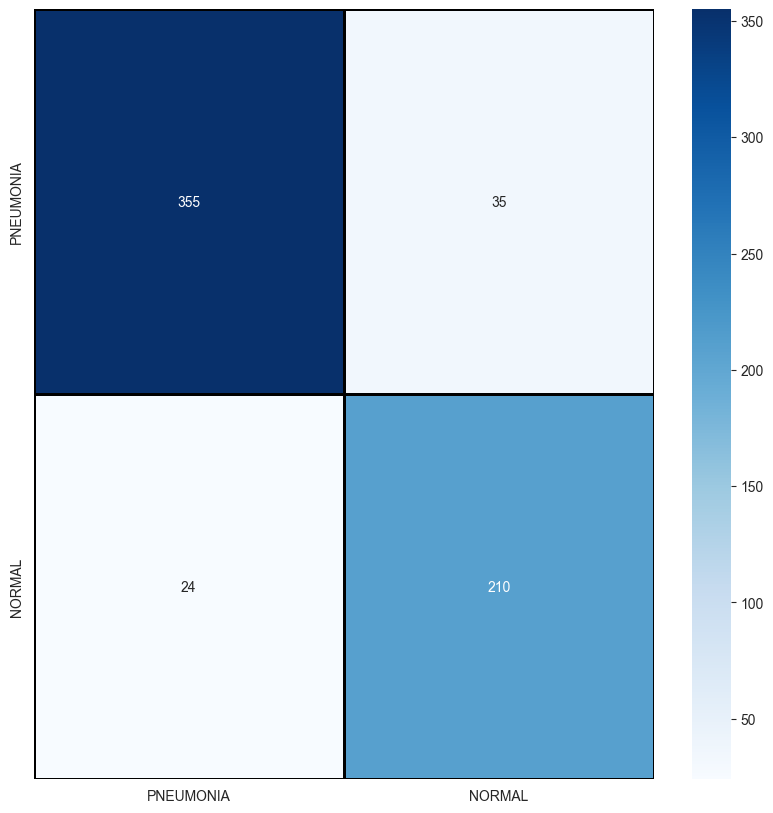

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [22]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Những ảnh được dự đoán đúng**

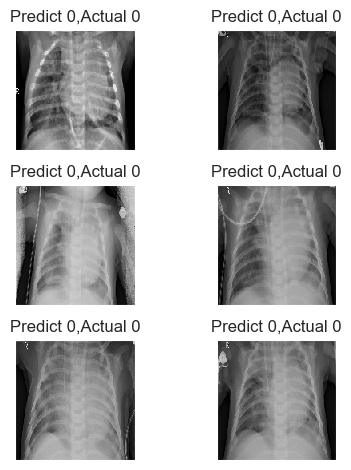

In [25]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predict {},Actual {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Những ảnh dự đoán sai**

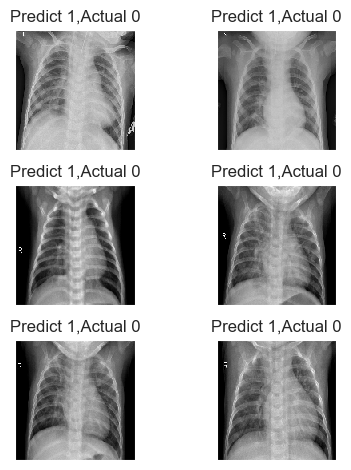

In [24]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predict {},Actual {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1